# Transfer learning and implementing the real time system 

The main motive of the notebook is to train a model using transfer learning on 300 species dataset from kaggle.

And implement real time system for classification.



#Import Dataset 

In [2]:
# procedure is to download an api token from kaggle and import it to the temporary memory 
# account ---> Api token

In [3]:
! pip install kaggle

In [6]:
! mkdir ~/.kaggle  #Making a directory as kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
! cp kaggle.json ~/.kaggle/  #Copying the file into the directory

In [9]:
! chmod 600 ~/.kaggle/kaggle.json   #Allocate permission for the folder

In [10]:
# ! kaggle competitions download <name-of-competition> #This is to download dataset from kaggle competition 

In [11]:
! kaggle datasets download gpiosenka/100-bird-species #For downloading the dataset from kaggle database 

 99% 1.07G/1.08G [00:07<00:00, 142MB/s]
100% 1.08G/1.08G [00:07<00:00, 152MB/s]


In [27]:
!unzip /content/100-bird-species.zip    #Unzipping the dataset

Streaming output truncated to the last 5000 lines.
  inflating: train/TRUMPTER SWAN/050.jpg  
  inflating: train/TRUMPTER SWAN/051.jpg  
  inflating: train/TRUMPTER SWAN/052.jpg  
  inflating: train/TRUMPTER SWAN/053.jpg  
  inflating: train/TRUMPTER SWAN/054.jpg  
  inflating: train/TRUMPTER SWAN/055.jpg  
  inflating: train/TRUMPTER SWAN/056.jpg  
  inflating: train/TRUMPTER SWAN/057.jpg  
  inflating: train/TRUMPTER SWAN/058.jpg  
  inflating: train/TRUMPTER SWAN/059.jpg  
  inflating: train/TRUMPTER SWAN/060.jpg  
  inflating: train/TRUMPTER SWAN/061.jpg  
  inflating: train/TRUMPTER SWAN/062.jpg  
  inflating: train/TRUMPTER SWAN/063.jpg  
  inflating: train/TRUMPTER SWAN/064.jpg  
  inflating: train/TRUMPTER SWAN/065.jpg  
  inflating: train/TRUMPTER SWAN/066.jpg  
  inflating: train/TRUMPTER SWAN/067.jpg  
  inflating: train/TRUMPTER SWAN/068.jpg  
  inflating: train/TRUMPTER SWAN/069.jpg  
  inflating: train/TRUMPTER SWAN/070.jpg  
  inflating: train/TRUMPTER SWAN/071.jpg  
  i

#Intialize all the dependencies

In [28]:
import pandas as pd   #importing pandas for working on tabular data like csv
import numpy as np    #importing numpy for linear algebra or matrix type calculation or multidimensional calculation
import os             #importing os for best interacting with operating system
import matplotlib.pyplot as plt   # is used for plotting the dataset
from IPython.display import Image, display    #opening, manipulating, and saving many different image file formats
import random     #For intialising random values 
import math     #For common math function

In [29]:
import tensorflow as tf   #Tensorflow for easier way to do high and low level machine learning task
from tensorflow import keras    #Keras for easy creation for building neural network model and evalute it it's only high level api
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator    #Image generator to maximize the dataset size for small dataset
from tensorflow.keras.models import Model, Sequential   #For creating model
from tensorflow.keras.utils import plot_model   #Plotting the model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate    #Function used during building the model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D    #Function used during building the model

In [30]:
from tensorflow.keras.layers import BatchNormalization    #Batch normalization is a method used to make artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling
from tensorflow.keras.utils import to_categorical   #Catergorical for multiclass classification
from tensorflow.keras.optimizers import Adam, SGD   #stochastic gradient descent and adam optimizer
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau    
from tensorflow.keras import backend, models    
from sklearn.metrics import confusion_matrix    #Confusion matrix 

In [31]:
from tensorflow.keras.applications import VGG16, MobileNet    #Importing the model
from keras.applications.vgg16 import preprocess_input   #preprocess the input

#Assign the dataset 

In [36]:
image_size = (224, 224)     #size of the image

train_path = '/content/train'   #Train set
valid_path = '/content/valid'   #Validation set
test_path = '/content/test'   #Test set

#Generator creation 

Data import for training

In [37]:
default_datagen = ImageDataGenerator(rescale=1./255)    #Normalising the image

In [38]:
# Image generator for augmentation
augmentation_datagen = ImageDataGenerator(rescale=1./255, 
                                          rotation_range=20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest') 

#Data is already splitted now imported by using the generator 

In [39]:
train_data = augmentation_datagen.flow_from_directory(train_path,
                                                      target_size=image_size)

Found 43622 images belonging to 300 classes.


Data import for validation

In [40]:
validation_data = augmentation_datagen.flow_from_directory(valid_path,
                                                      target_size=image_size)

Found 1500 images belonging to 300 classes.


Data import for testing

In [41]:
test_data = augmentation_datagen.flow_from_directory(test_path,
                                                      target_size=image_size)

Found 1500 images belonging to 300 classes.


#Dataset visualisation 

Found 43622 files belonging to 300 classes.


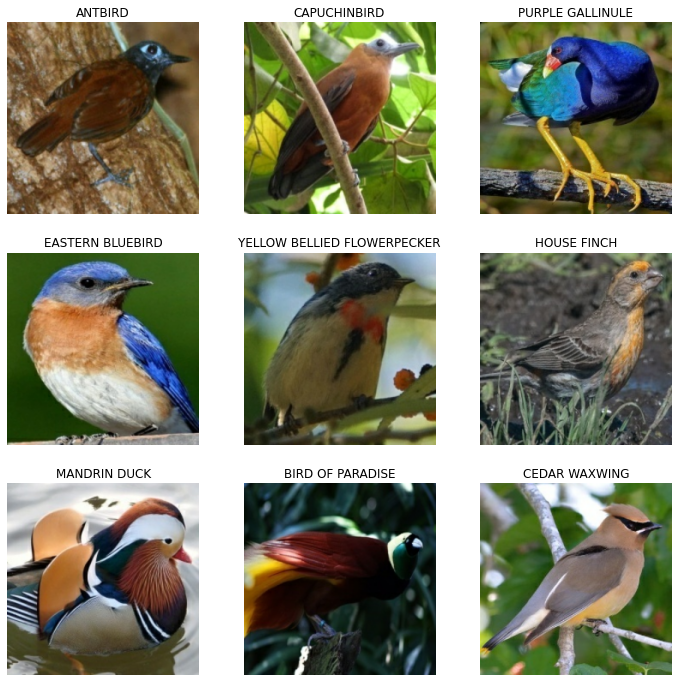

In [42]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_path)
class_names = train_dataset.class_names

plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#Model import

In [49]:
# Importing the network
base_mobilenet = MobileNet(weights = 'imagenet',
                           include_top = False,
                           input_shape = (224,224,3))

17235968/17225924 [==============================] - 0s 0us/step


In [50]:
# Freezing the weights and freezing all the layer in the network
base_mobilenet.trainable = False 

In [51]:
# Adding the flatten layer and dense layer
model = Sequential()
# We add the base model as a new layer
model.add(base_mobilenet)
model.add(Flatten()) 
model.add(Activation('relu'))
# 275 - number of classes
model.add(Dense(300)) 
model.add(Activation('softmax'))

In [52]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
activation (Activation)      (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 300)               15053100  
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0         
Total params: 18,281,964
Trainable params: 15,053,100
Non-trainable params: 3,228,864
_________________________________________________________________


#Model fit and train the model

In [53]:
# we want our learning rate to be adaptive
opt = tf.keras.optimizers.SGD(lr=0.001,
                              momentum=0.6,
                              nesterov=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [54]:
# convert the code to machine level code that's the function of compile
model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [56]:
#Training the model using the dataset 
history = model.fit(
    train_data, 
    steps_per_epoch = 600, 
    epochs = 5,
    validation_data = validation_data,
    validation_steps = 32,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy',
                             patience=3,
                             restore_best_weights=True),
               ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.7,
                                 patience=2,
                                 verbose=1)]
) 

Epoch 1/5
600/600 [==============================] - 263s 437ms/step - loss: 1.9658 - accuracy: 0.5857 - val_loss: 1.1926 - val_accuracy: 0.7197
Epoch 2/5
600/600 [==============================] - 260s 434ms/step - loss: 1.3840 - accuracy: 0.6941 - val_loss: 0.9253 - val_accuracy: 0.7822
Epoch 3/5
600/600 [==============================] - 262s 437ms/step - loss: 1.1106 - accuracy: 0.7486 - val_loss: 0.8689 - val_accuracy: 0.7939
Epoch 4/5
600/600 [==============================] - 266s 444ms/step - loss: 0.9742 - accuracy: 0.7766 - val_loss: 0.7293 - val_accuracy: 0.8301
Epoch 5/5
600/600 [==============================] - 262s 437ms/step - loss: 0.8475 - accuracy: 0.8003 - val_loss: 0.6822 - val_accuracy: 0.8379


#Saving the model weights

In [59]:
model.save('/content/model_weight')

INFO:tensorflow:Assets written to: /content/model_weight/assets


INFO:tensorflow:Assets written to: /content/model_weight/assets


In [60]:
from tensorflow import keras
model = keras.models.load_model('/content/model_weight')

#Test the model

In [57]:
model.evaluate(test_data)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

47/47 [==============================] - 20s 430ms/step - loss: 0.6498 - accuracy: 0.8407


[0.6497929692268372, 0.840666651725769]

#Graphs on error 

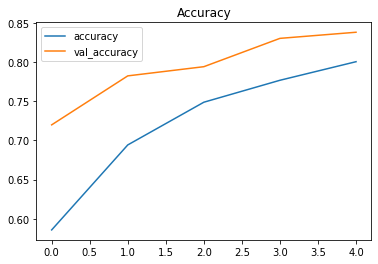

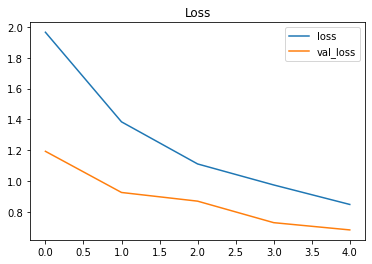

In [58]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

#Built the realtime system

Gradio is used for the application interface creation

In [104]:
! pip install gradio

In [126]:
def predict_img(img):
  img_3d=img.reshape(-1,224,224,3)
  im_resize = img_3d
  prediction = model.predict(im_resize)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [129]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=5)


In [130]:
gr.Interface(fn=predict_img, inputs=image, outputs=label, capture_session=True).launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 72 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted
Running on External URL: https://37756.gradio.app
Interface loading below...


KeyboardInterrupt: ignored